In [5]:
#!/usr/bin/python
import numpy as np
import scipy as sc
#import matplotlib.pyplot as plt
import os, sys, bz2
import pandas as pd
import datetime
%matplotlib inline

In [6]:
col_names = [ 'date','time','Vrms',
          'Irms1', 'realPower1', 'apparentPower1', 'powerFactor1', 
          'Irms2', 'realPower2', 'apparentPower2', 'powerFactor2', 
          'Irms3', 'realPower3', 'apparentPower3', 'powerFactor3'
         ]

In [7]:
#leemos los datos y los guardamos en un pandas datafraem
data = pd.read_csv('dades/DadesArduino3-160104.res.bz2', 
                   sep=' ', 
                   compression='bz2',
                   header = None,
                   names = col_names,
                   index_col=False
                   )

In [8]:
data.head()

,date,time,Vrms,Irms1,realPower1,apparentPower1,powerFactor1,Irms2,realPower2,apparentPower2,powerFactor2,Irms3,realPower3,apparentPower3,powerFactor3
0,03/01/16,00:00:04,236.676,1.053,178.030,249.324,0.714,1.460,217.577,345.585,0.630,1.195,198.599,282.771,0.702
1,03/01/16,00:00:14,236.536,1.059,178.168,250.380,0.712,1.475,220.301,348.803,0.632,1.190,195.973,281.530,0.696
2,03/01/16,00:00:25,237.490,1.068,180.483,253.580,0.712,1.490,222.580,353.886,0.629,1.144,190.530,271.717,0.701
3,03/01/16,00:00:35,237.590,1.055,179.452,250.773,0.716,1.506,202.373,357.724,0.566,1.274,216.830,302.628,0.716
4,03/01/16,00:00:46,237.964,1.057,180.485,251.443,0.718,1.546,207.429,367.898,0.564,1.157,193.703,275.364,0.703


In [9]:
#index en formato de datetime
data.index = pd.to_datetime(data['date'] + ' ' + data['time'], dayfirst = True)

In [10]:
#calcular el delta time
data['tvalue'] = data.index
data['delta'] = (data['tvalue']-data['tvalue'].shift()).fillna(0)/ np.timedelta64(1,'s')

In [11]:
data.head()

,date,time,Vrms,Irms1,realPower1,apparentPower1,powerFactor1,Irms2,realPower2,apparentPower2,powerFactor2,Irms3,realPower3,apparentPower3,powerFactor3,tvalue,delta
2016-01-03 00:00:04,03/01/16,00:00:04,236.676,1.053,178.030,249.324,0.714,1.460,217.577,345.585,0.630,1.195,198.599,282.771,0.702,2016-01-03 00:00:04,0
2016-01-03 00:00:14,03/01/16,00:00:14,236.536,1.059,178.168,250.380,0.712,1.475,220.301,348.803,0.632,1.190,195.973,281.530,0.696,2016-01-03 00:00:14,10
2016-01-03 00:00:25,03/01/16,00:00:25,237.490,1.068,180.483,253.580,0.712,1.490,222.580,353.886,0.629,1.144,190.530,271.717,0.701,2016-01-03 00:00:25,11
2016-01-03 00:00:35,03/01/16,00:00:35,237.590,1.055,179.452,250.773,0.716,1.506,202.373,357.724,0.566,1.274,216.830,302.628,0.716,2016-01-03 00:00:35,10
2016-01-03 00:00:46,03/01/16,00:00:46,237.964,1.057,180.485,251.443,0.718,1.546,207.429,367.898,0.564,1.157,193.703,275.364,0.703,2016-01-03 00:00:46,11


In [12]:
data.realEnergy1 = data.realPower1 * data.delta / (60*60*1000)
data.realEnergy2 = data.realPower2 * data.delta / (60*60*1000)
data.realEnergy3 = data.realPower3 * data.delta / (60*60*1000)

In [13]:
print('L1 %0.2f [kWh]' %data.realEnergy1.sum())
print('L1 %0.2f [kWh]' %data.realEnergy2.sum())
print('L1 %0.2f [kWh]' %data.realEnergy3.sum())

L1 3.09 [kWh]
L1 4.33 [kWh]
L1 5.80 [kWh]


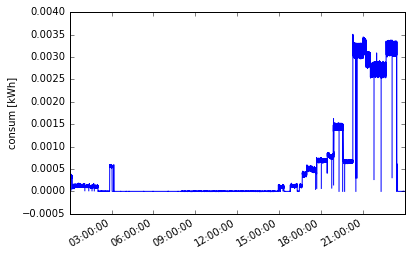

In [14]:
ax = data.realEnergy2.plot()
ax.set_ylabel('consum [kWh]')

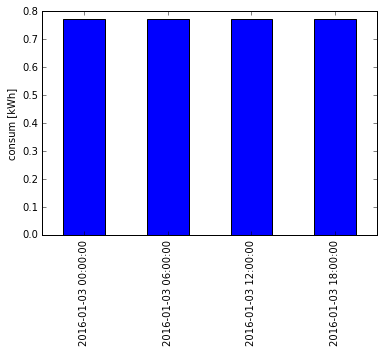

In [15]:
ax = data.realEnergy1.resample('6H', how='sum').plot(kind='bar')
ax.set_ylabel('consum [kWh]')


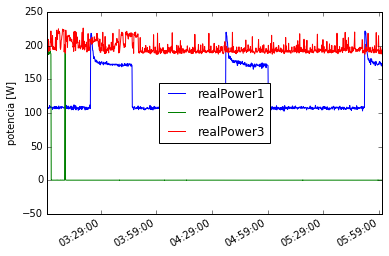

In [16]:
allPowers = data[['realPower1', 'realPower2', 'realPower3']]
ax = allPowers['2016-1-03 03:00':'2016-1-03 06:00'].plot()
ax.set_ylabel('potencia [W]')